# Epidemic on Networks | `EoN`

* Module that provides tools to study the spread of **SIS** and **SIR** diseases in networks
* [Paper](https://doi.org/10.21105/joss.01731)
* [Textbook](http://www.springer.com/us/book/9783319508047)
* [GitHub repository](https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks)

## Modules

In [19]:
# Network Data Science 
import networkx as nx

# Epidemic Modelling
import EoN

# Numerical Computation
import numpy as np

# Statistics
import random as rnd

# Data Visualization
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### SIR Epidemic on Barabasi-Albert Graph 

/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


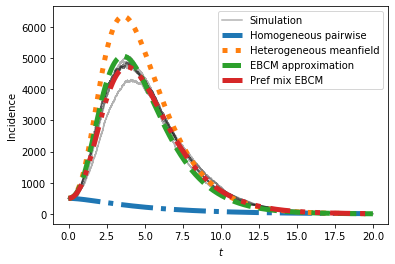

In [2]:
# Parameters 
N=10**5      # initialize population size

# Ambient Space
G=nx.barabasi_albert_graph(N, 5) # create a Barabasi-Albert graph

tmax = 20           
iterations = 5      # run 5 simulations
tau = 0.1           # transmission rate
gamma = 1.0         # recovery rate
rho = 0.005         # random fraction initially infected


for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)

#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])

plt.xlabel('$t$')
plt.ylabel('Incidence')
plt.legend()
plt.savefig('SIR_BA_model_vs_sim.png')

# NB: The preferential mixing version of the EBCM approach provides the best approximation to the (gray) simulated epidemics. 

### `fast_SIR`

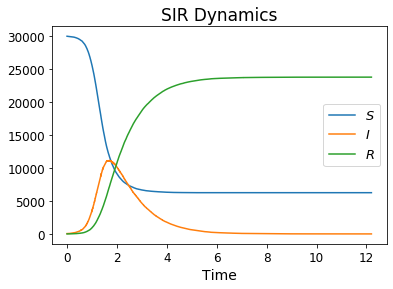

In [69]:
G = nx.configuration_model([1,5,10]*10000)
initial_size = 50
gamma = 1.1
tau = 1.
t, S, I, R = EoN.fast_SIR(G, tau, gamma,
                            initial_infecteds = range(initial_size))

plt.plot(t, S, label = '$S$')
plt.plot(t, I, label = '$I$')
plt.plot(t, R, label = '$R$')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 13)
#plt.ylabel("Incidence", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.title("SIR Dynamics", fontsize = 17)
plt.show()

### SIS Epidemic on Barabasi-Albert Graph 

/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


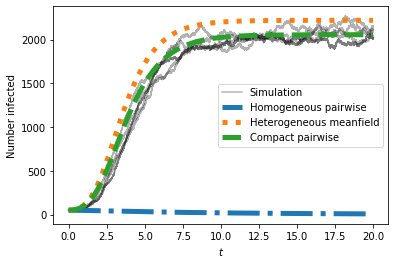

In [3]:
plt.clf()

# Parameters 
N=10**4      # initialize population size

# Ambient Space
G=nx.barabasi_albert_graph(N, 5) # create a Barabasi-Albert graph

for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.savefig('SIS_BA_model_vs_sim.png')

### `fast_SIS`

/Users/pietromonticone/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


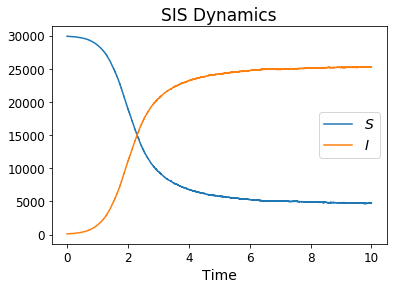

In [70]:
G = nx.configuration_model([1,5,10]*10000)
initial_size = 100
gamma = 0.2
tau = 0.5
t, S, I = EoN.fast_SIS(G, tau, gamma, tmax = 10,
                            initial_infecteds = range(initial_size))

plt.plot(t, S, label = '$S$')
plt.plot(t, I, label = '$I$')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 14)
#plt.ylabel("Incidence", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.title("SIS Dynamics", fontsize = 17)
plt.show()